# Classification de photos de légumes

Todo:
- Revoir l'accès au label d'une classe
- Revoir la fonction heatmap des couches d'activations pour que cela soit raccord avec la heatmap du grad-cam
- Les images doivent être normalisées, mais garder en mémoire quelque part la matrice RGB pour pouvoir utiliser le grd-cam

## Problèmatique

Le projet consiste à obtenir un modèle capable de classer une photo de légume.<br />

## Les données

Les données utilisées pour ce projet proviennent d'un dataset trouvé sur Kaggle.<br />
Source : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/data<br />
Le dataset a été téléchargé à la main au préalable, puis déposé dans le dossier resources.

## Modules

In [1]:
import nnz

w = nnz.Workspace()

2024-06-04 22:51:00.337669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 22:51:01.048508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# X_train, y_train, X_val, y_val, X_test, y_test = w.splitFolders("./resources/classes", "./resources", verbose=1, size_train=0.6, size_val=0.15, size_test=0.25, resize=(128,128))

In [3]:
w.get_classes()

,name,train_count,val_count,test_count
0,Bitter_Gourd,840,210,350
1,Cauliflower,840,210,350
2,Papaya,840,210,350
3,Tomato,840,210,350
4,Brinjal,840,210,350
5,Carrot,840,210,350
6,Capsicum,840,210,350
7,Potato,840,210,350
8,Bean,840,210,350
9,Bottle_Gourd,840,210,350


In [4]:
# Loader from dataset if exist
X_train, y_train, X_val, y_val, X_test, y_test = w.loadDatasetSplited(path_file='./resources/dataset.h5')
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_val : ", X_val.shape)
print("y_val : ", y_val.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

import numpy as np
from sklearn.preprocessing import LabelEncoder
y_train_encoder = LabelEncoder()
y_train = y_train_encoder.fit_transform(y_train)

y_val_encoder = LabelEncoder()
y_val = y_val_encoder.fit_transform(y_val)

y_test_encoder = LabelEncoder()
y_test = y_test_encoder.fit_transform(y_test)

X_train :  (12600, 128, 128, 3)
y_train :  (12600,)
X_val :  (3150, 128, 128, 3)
y_val :  (3150,)
X_test :  (5250, 128, 128, 3)
y_test :  (5250,)


## Normalisation des images

In [5]:
print('Avant normalisation X_train : Min={}, max={}'.format(X_train.min(),X_train.max()))
print('Avant normalisation X_val : Min={}, max={}'.format(X_val.min(),X_val.max()))
print('Avant normalisation X_test : Min={}, max={}'.format(X_test.min(),X_test.max()))

# xmax_train = X_train.max()
# xmax_val = X_val.max()
# xmax_test = X_test.max()
# X_train = X_train / xmax_train
# X_val = X_val / xmax_val
# X_test = X_test / xmax_test

print('Après normalisation X_train : Min={}, max={}'.format(X_train.min(),X_train.max()))
print('Après normalisation X_val : Min={}, max={}'.format(X_val.min(),X_val.max()))
print('Après normalisation X_test : Min={}, max={}'.format(X_test.min(),X_test.max()))

Avant normalisation X_train : Min=0, max=255
Avant normalisation X_val : Min=0, max=255
Avant normalisation X_test : Min=0, max=255
Après normalisation X_train : Min=0, max=255
Après normalisation X_val : Min=0, max=255
Après normalisation X_test : Min=0, max=255


## Visualisation des 10 premières images de chaque set

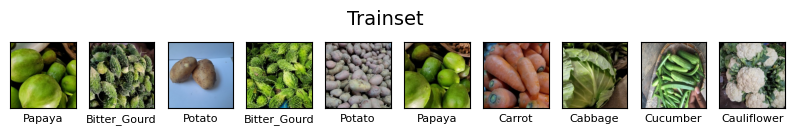

In [6]:
w.showImages(X_train, y=y_train, title="Trainset", classes=y_train_encoder.classes_)

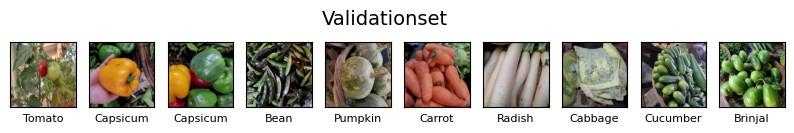

In [7]:
w.showImages(X_val, y=y_val, title="Validationset", classes=y_val_encoder.classes_)

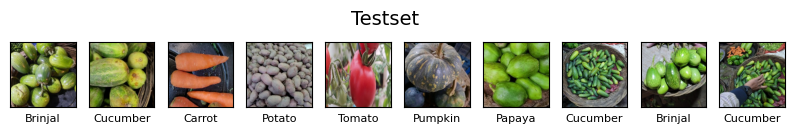

In [8]:
w.showImages(X_test, y=y_test, title="Testset", classes=y_test_encoder.classes_)

## Création du modèle

In [9]:
num_classes = len(y_train_encoder.classes_)

inputs = nnz.tensorflow.keras.layers.Input(shape=(128,128,3) )
x = nnz.tensorflow.keras.layers.Conv2D(32, (3,3),  activation='relu')(inputs)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Conv2D(64, (3,3),  activation='relu')(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Conv2D(128, (3,3),  activation='relu')(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Flatten()(x)
x = nnz.tensorflow.keras.layers.Dense(512, activation='relu')(x)
x = nnz.tensorflow.keras.layers.Dropout(0.5)(x)

output = nnz.tensorflow.keras.layers.Dense(num_classes, activation="softmax")(x)
model = nnz.tensorflow.keras.models.Model(inputs,output)
model.summary()

2024-06-04 22:51:04.192903: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 22:51:04.193295: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,946,511 (49.39 MB)

 Trainable params: 12,946,511 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# import gc
# gc.collect()
# nnz.torch.cuda.empty_cache()

name_model = 'test'

# history = w.fitModel(model, X_train, y_train, X_val, y_val, name=name_model, epochs=3, batch_size=32)
model = w.loadModel(name_model)

In [12]:
loaded_model = w.loadModel(name_model)
score = loaded_model.evaluate(X_test, y_test, verbose=1)


165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.4661 - loss: 1.7298


In [13]:
import pandas as pd
log_data = pd.read_csv('./runtime/test.history.log', sep=',', engine='python')
log_data

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.174524,9.651618,0.159683,2.519885
1,1,0.229365,2.348081,0.227302,2.322641
2,2,0.379841,1.875601,0.447937,1.744175


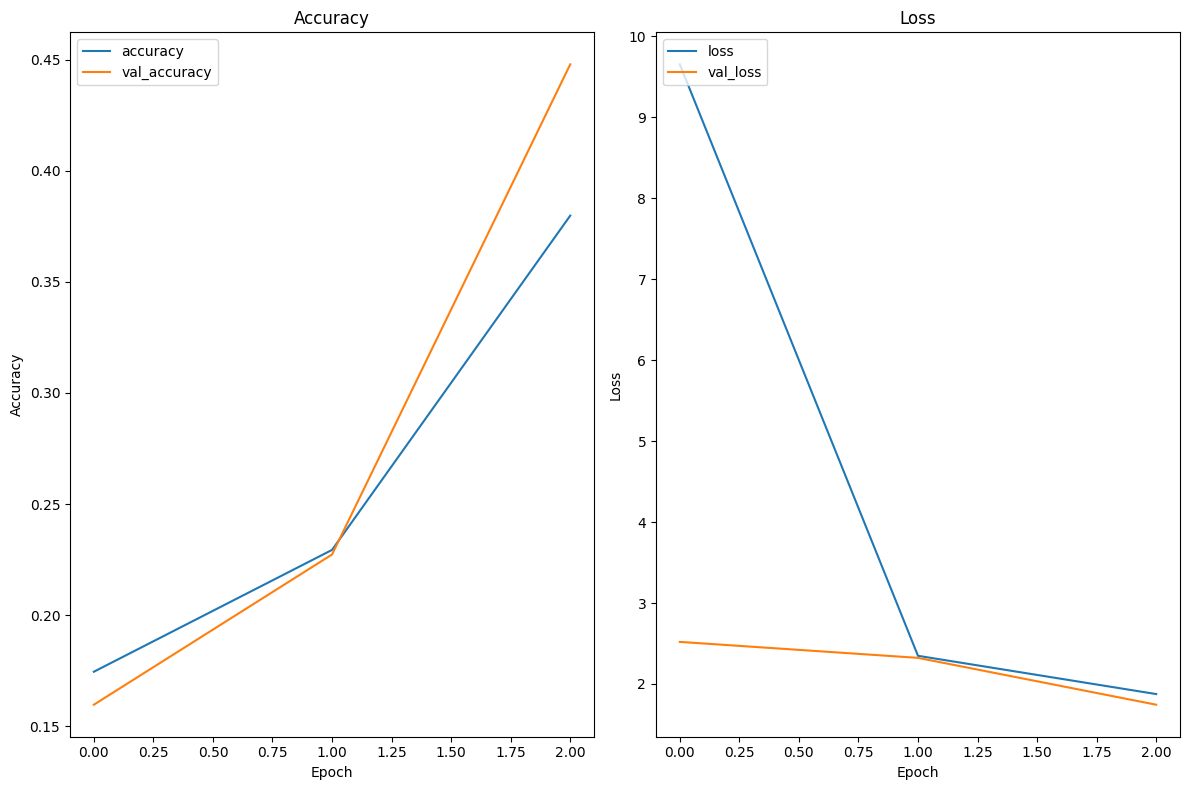

In [14]:
w.showMetrics(name=name_model)

In [15]:
y_sigmoid = model.predict(X_test, verbose=1)
y_pred    = np.argmax(y_sigmoid, axis=-1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step


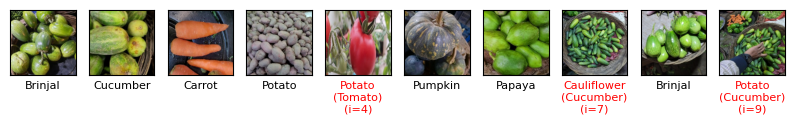

In [16]:
w.showImages(X_test, y=y_test, indices=range(0,100), y_pred=y_pred, classes=y_test_encoder.classes_)

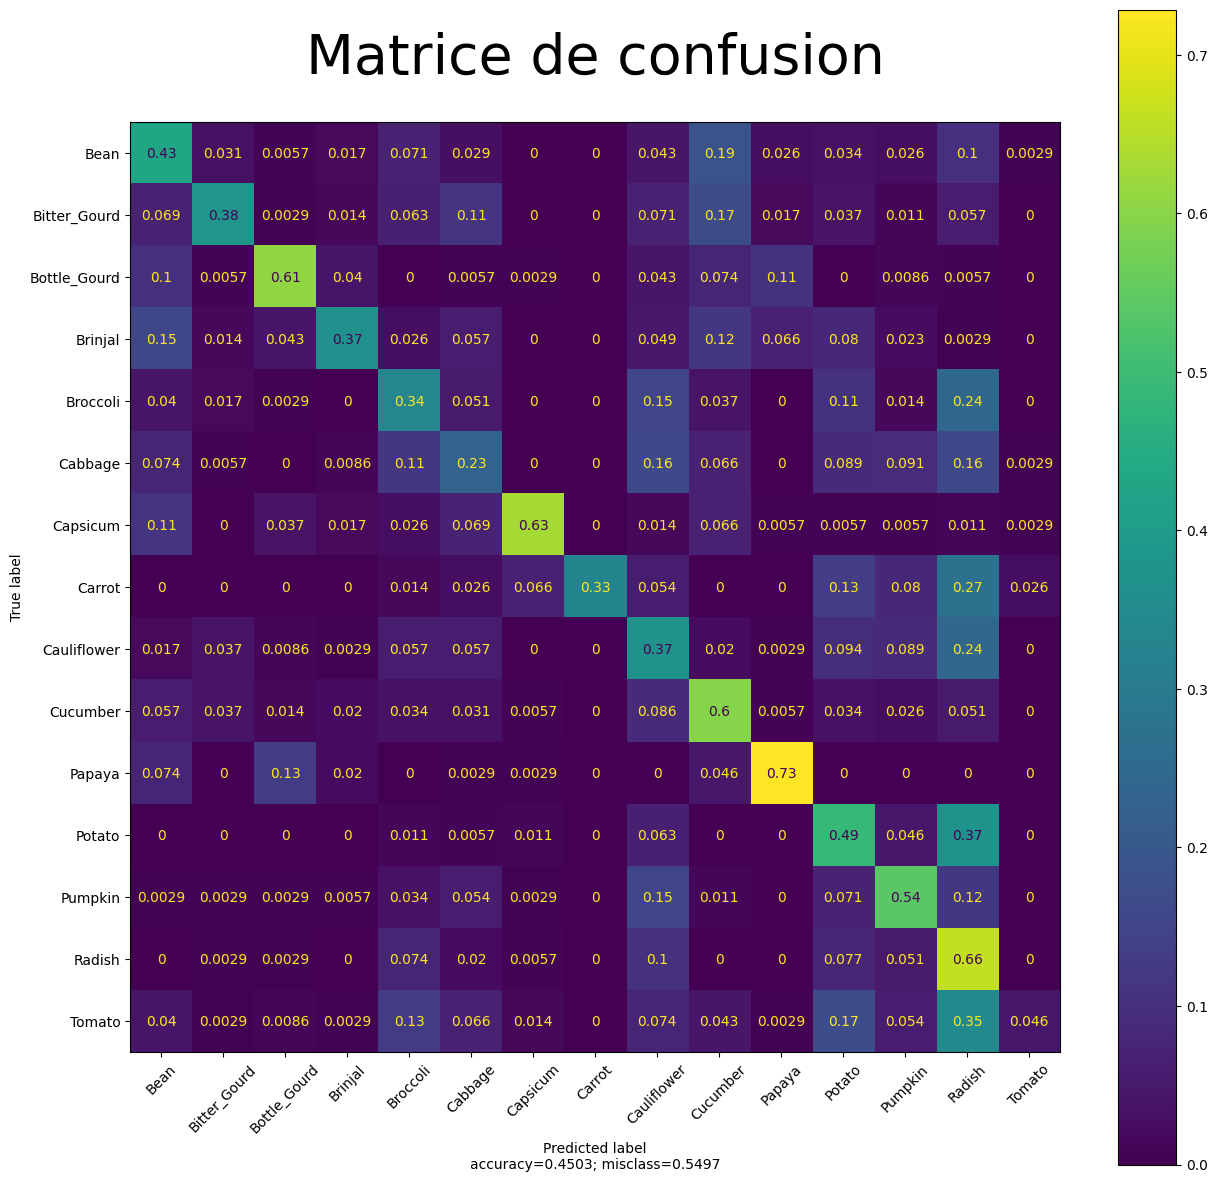

,accuracy,precision,recall,f1
Bean,0.450286,0.367647,0.428571,0.395778
Bitter_Gourd,0.450286,0.707447,0.380000,0.494424
Bottle_Gourd,0.450286,0.705298,0.608571,0.653374
Brinjal,0.450286,0.712707,0.368571,0.485876
Broccoli,0.450286,0.340058,0.337143,0.338594
Cabbage,0.450286,0.283217,0.231429,0.254717
Capsicum,0.450286,0.850000,0.631429,0.724590
Carrot,0.450286,1.000000,0.328571,0.494624
Cauliflower,0.450286,0.260437,0.374286,0.307151
Cucumber,0.450286,0.418000,0.597143,0.491765


In [17]:
w.confusionMatrix(y_test, y_pred, y_test_encoder.classes_)

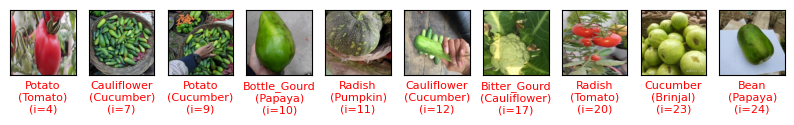

Nombre total d'erreur : 2886 / 5250 ( 54.97 % ) 


In [18]:
w.showPredictionsErrors(X_test, y_test , y_pred, classes=y_test_encoder.classes_)

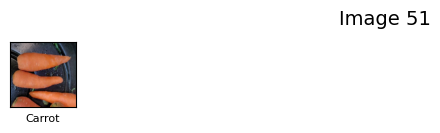

In [19]:
img_verif = 2
w.showImages(X_test, y=y_test, indices=[img_verif], title="Image 51", classes=y_test_encoder.classes_)

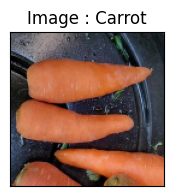

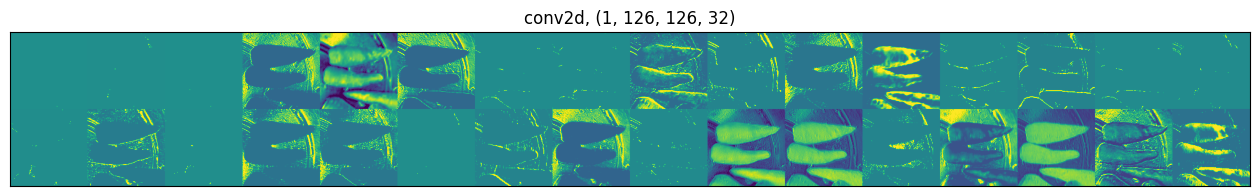

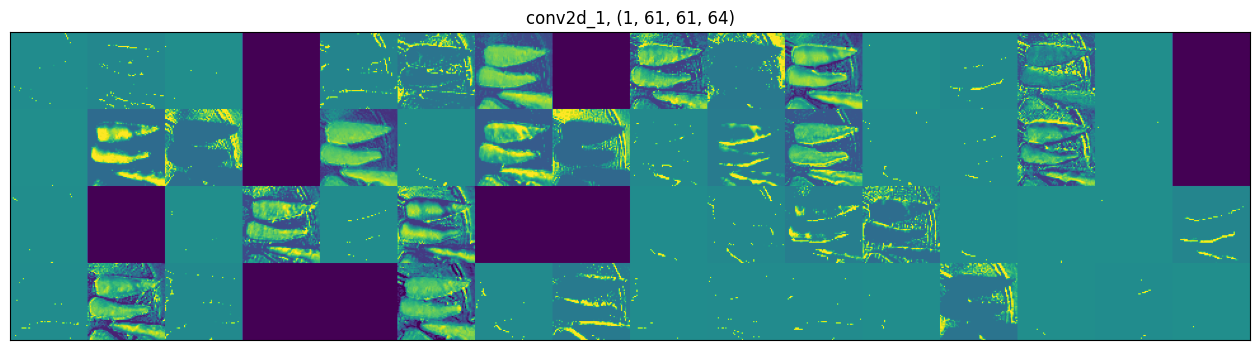

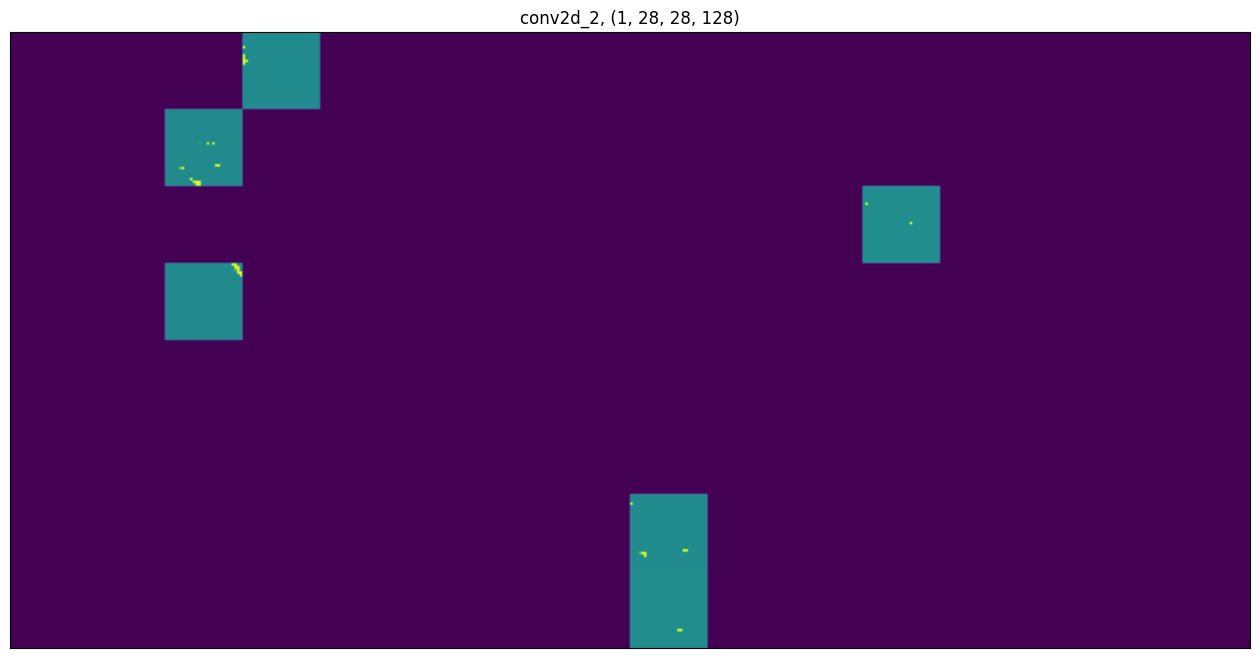

,classe,score
0,b'Carrot',0.364331
1,b'Tomato',0.178185
2,b'Potato',0.141932


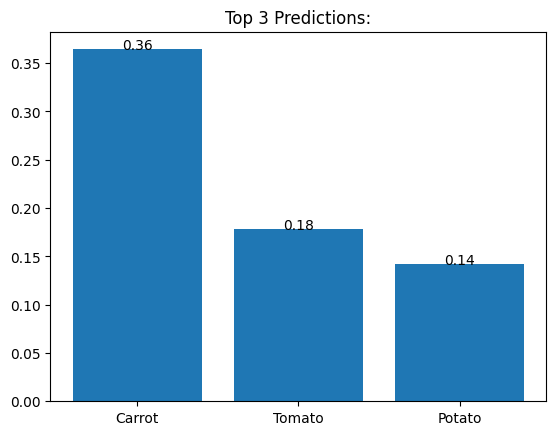

In [20]:
w.showLayerActivation(model, img=X_test[img_verif], name= str(y_test_encoder.classes_[y_test[img_verif]], encoding="utf-8"), limit_layers="conv", show_top=True, labels=y_test_encoder.classes_, verbose=0 )

In [21]:
from IPython.display import Image, display
from PIL import Image as im 

preprocess_input = nnz.keras.applications.xception.preprocess_input
decode_predictions = nnz.keras.applications.xception.decode_predictions

In [22]:
# data = im.fromarray(X_test[img_verif])
X_test[img_verif].shape
image = X_test[img_verif]
img_array = np.expand_dims(image, axis=0)
img_array.shape

(1, 128, 128, 3)

In [23]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = nnz.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with nnz.tensorflow.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = nnz.tensorflow.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = nnz.tensorflow.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., nnz.tensorflow.newaxis]
    heatmap = nnz.tensorflow.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = nnz.tensorflow.maximum(heatmap, 0) / nnz.tensorflow.math.reduce_max(heatmap)
    return heatmap.numpy()

In [24]:
# Remove last layer's softmax
# model.layers[-1].activation = None
# print("Avant", img_array)
# img_array = preprocess_input(img_array)
# print("Apres", img_array)

In [25]:
preds = model.predict(img_array)
preds.shape
c = np.argmax(preds[0])
print("Predicted:", c, y_test_encoder.classes_[c] )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted: 7 b'Carrot'


In [26]:
print(model.layers)
layers = [ l.name for l in model.layers if "conv" in l.name ]
# layers = [ l.name for l in model.layers]
last_conv_layer_name = layers[-1]
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, c)
last_conv_layer_name

[<InputLayer name=input_layer, built=True>, <Conv2D name=conv2d, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Dropout name=dropout, built=True>, <Conv2D name=conv2d_1, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Dropout name=dropout_1, built=True>, <Conv2D name=conv2d_2, built=True>, <MaxPooling2D name=max_pooling2d_2, built=True>, <Dropout name=dropout_2, built=True>, <Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dropout name=dropout_3, built=True>, <Dense name=dense_1, built=True>]


'conv2d_2'

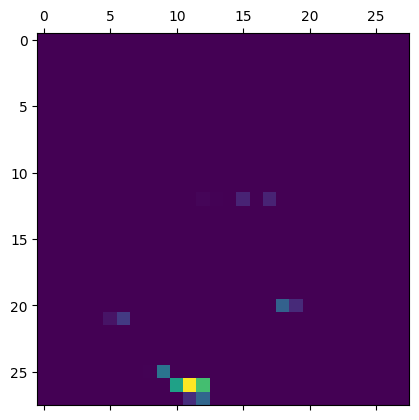

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.matshow(heatmap, aspect='auto', cmap='viridis')
plt.show()

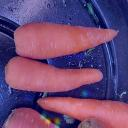

In [31]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.5):
    # Load the original image
    # img = keras.utils.load_img(img_path)
    # img = keras.utils.img_to_array(img)
    img = img_path[...,::-1].reshape(128,128,3)
       
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = nnz.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = nnz.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = nnz.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_array, heatmap)